Y : dependent : DV : 종속변수 : output 
X : indepent : IV : feature : 독립변수 : input

지도학습 
Y (수치) : 회귀 regression
  (분류) : 범주 classification

=====
데이타를 training / testing 으로 나눔
X_tran, y_tran => modeling
X_test, y_test => 채점 (validating) 예측값과 실제와의 차이점 최소화

=====
linear : y = 2x+1 (기울기, 절편)
기울기 : slope : coefficeient : 계수  = data의 trend를 보여줌

=====
1. scipy 에 있는 회귀분석 사용
2. sklearn 에 있는 회귀 분석 사용 ( if가 똑같고 사용하기 편함 )
    : xgboost , emsemble, tree 등 알고리즘 사용가능
3. statmodels (통계가 들어가 있는 library)

mse ( mean (Y-y^)2)
rmse (root mse)
mape (절대값 비율)
mae (절대값 평균)

p-value : 새로운 가설이 유효한지 확인 5% 이하
corr = 0.4 : h0 : corr = 0 (귀무가설, 기존)
             h1 : corr != 0


h0 이 참일 확률 p-value 
p-value < 5% : h1 이 크다 (기존 견해 기각)
p-value > 5% : h0 이 참이다

결정계수 : R2 : 0~1 사이 ()

y=ax+b
standard scaling 

Y , X
log(y), X
log(y), log(X)  => 이건 잘 사용 안함

In [6]:
import pandas as pd
import numpy as np
from scipy import stats # linregress
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import seaborn as sns


In [10]:
df = pd.DataFrame([[1,10],[2,11],[3,12],[4,13]], columns=['X','y'])
model1 = stats.linregress(df.X, df.y) # x 변수 1개일 경우만 작동
model2 = LinearRegression().fit(df.X.values.reshape(-1,1), df.y) # X는 2D로 
model3 = sm.OLS(df.y, df.X).fit()

arr = np.array([1,2,3])
arr.reshape(3,1)

print(model2)

LinearRegression()


In [5]:
#imputing / partitioning / scaling / correlation(heatmap)

# test 예측, 정답 .. mse

adv = pd.read_csv('data/adv.csv', index_col = 0)
adv.info() # 결측치 확인
# adv.fillna()

# 원칙은 파티셔닝 -> 스케일링 하는게 맞음
# X_train, X_test, y_train, y_test = train_test_split (adv)
train, test = train_test_split(adv)
scaler = StandardScaler()
scaler.fit(train) # 평균, 편차
# scaler = StandardScaler().fit(train)
scaler.transform(train)
scaler.transform(test)
train = pd.DataFrame(scaler.transform(train), columns=adv.columns)
test = pd.DataFrame(scaler.transform(test), columns=adv.columns)


<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [11]:
binary = pd.read_csv('data/binary.csv')
#admit 을 target / gre랑 gra가 scale 이 다름
# admit 은 0, 1 이지만 숫자값이 아님 encoding 값임, 범주를 나타냄 즉 regression 이 아닌 분류값으로 사용해야 함
# rank 는 1,2,3,4 값이 나오고 있음 => 이것도 범주로 봐야 할 수 있음
# 실제 값을 보고 값의 성격을 파악해야 함
binary.info()
binary["admit"].dtype
binary["admit"].value_counts()
binary["rank"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   admit   400 non-null    int64  
 1   gre     400 non-null    int64  
 2   gpa     400 non-null    float64
 3   rank    400 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 12.6 KB


rank
2    151
3    121
4     67
1     61
Name: count, dtype: int64

In [17]:
num_vars = [ i for i in binary.columns if binary[i].dtype != "o" ]
num_vars

['admit', 'gre', 'gpa', 'rank']

In [25]:
# diamonds.csv 파일 읽어 price, carat 두 컬럼 사용
# missing 확인, imputing , partitioning, scaling
#scipy, sklearn, statmodels 로 회귀 분석
# Y : price, X : carat
# test로 예측
import pandas as pd
import numpy as np
from scipy import stats # linregress
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import statsmodels.api as sm
import seaborn as sns



In [19]:
dia = pd.read_csv('data/diamonds.csv')

dia.info(_)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   carat   53940 non-null  float64
 1   price   53940 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 842.9 KB


<Axes: >

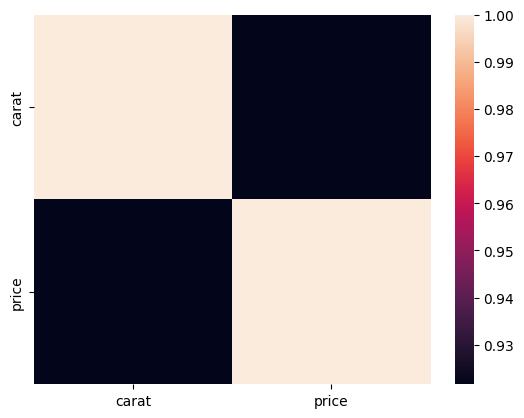

In [41]:

dia2 = dia[['carat', 'price']]
dia2.info()

sns.heatmap(dia2.corr())

In [45]:

imputer = SimpleImputer(strategy='median')  #또는 mean
imputer.fit(dia2) #median값을 찾아줌.
print(imputer.statistics_)
dia3 = pd.DataFrame(imputer.transform(dia2))
print(dia3.isnull().mean())


[7.000e-01 2.401e+03]
0    0.0
1    0.0
dtype: float64


In [47]:
dia_train, dia_test = train_test_split(dia3, test_size=0.3)
print(dia_train.shape)
print(dia_test.shape)

scaler = StandardScaler()
scaler.fit(dia_train)
scaler.fit(dia_test)
dia_train = pd.DataFrame(scaler.transform(dia_train), columns=dia2.columns)
dia_test = pd.DataFrame(scaler.transform(dia_test), columns=dia2.columns)

# dia_test.info()
#X = dia_test.carat
#Y = dia_test.price





(37758, 2)
(16182, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16182 entries, 0 to 16181
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   carat   16182 non-null  float64
 1   price   16182 non-null  float64
dtypes: float64(2)
memory usage: 253.0 KB


In [53]:
model1 = stats.linregress(dia_train.carat, dia_train.price)
model1
np.mean((dia_test.price - dia_test.carat*0.922)**2)

0.14741686400565127

In [60]:
model2 = LinearRegression().fit(dia_train.carat.values.reshape(-1,1), dia_train.price) # X는 2D로
model2.coef_
np.mean((dia_test.price - model2.predict(dia_test.carat.values.reshape(-1,1))) **2) # X는 2D로

0.1474290023174185

In [67]:
model3 = sm.OLS(dia_train.price, dia_train.carat).fit()
print(model3.summary())
np.mean( (dia_test.price - model3.predict(dia_test.carat))**2)

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.848
Model:                            OLS   Adj. R-squared (uncentered):              0.848
Method:                 Least Squares   F-statistic:                          2.105e+05
Date:                Fri, 01 Sep 2023   Prob (F-statistic):                        0.00
Time:                        13:33:03   Log-Likelihood:                         -17802.
No. Observations:               37758   AIC:                                  3.561e+04
Df Residuals:                   37757   BIC:                                  3.561e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

0.14742320590047434

In [76]:
#sns.pairplot(dia)

#sns.heatmap(dia.corr())

dia.columns
colnames = ['carat','depth', 'table', 'price']
train, test = train_test_split(dia[colnames], test_size=0.2)


In [77]:
scaler = StandardScaler()
scaler.fit(train)
scaler.fit(test)
train = pd.DataFrame(scaler.transform(train), columns=colnames)
test = pd.DataFrame(scaler.transform(test), columns=colnames)


In [82]:
model2 = LinearRegression().fit(train.drop("price", axis=1), train.price)
model2.coef_
np.mean((test.price - model2.predict(test.drop("price", axis=1))) **2) # X는 2D로

0.1442424932163105

In [84]:
model3 = sm.OLS(test.price, test.drop("price", axis=1)).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.856
Model:                            OLS   Adj. R-squared (uncentered):              0.856
Method:                 Least Squares   F-statistic:                          2.135e+04
Date:                Fri, 01 Sep 2023   Prob (F-statistic):                        0.00
Time:                        13:49:43   Log-Likelihood:                         -4859.7
No. Observations:               10788   AIC:                                      9725.
Df Residuals:                   10785   BIC:                                      9747.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
carat          0.9347      0.004    250.751      0.000       0.927       0.942
depth         -0.0569      0.004    -14.764      0.000      -0.064      -0.049
table         -0.0579      0.004    -14.814      0.000      -0.066      -0.050
==============================================================================
Omnibus:                     2636.048   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25985.147
Skew:                           0.889   Prob(JB):                         0.00
Kurtosis:                      10.392   Cond. No.                         1.45
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
# mortdefault 읽어서, default column 의 0, 1 비율 확인
# missing 확인, imputing
# year column 제거
# default가 0인 행만 선택 후 default 삭제
# 파티셔닝, 스케일링 (min-max)
# 선형회귀 y creditscore, X house.. employ, ccdebt
# statmodels test에 rmse 구해
md_org = pd.read_csv('data/mortDefault.csv')
md_org.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   creditScore  1000000 non-null  object 
 1   houseAge     999999 non-null   float64
 2   yearsEmploy  999999 non-null   float64
 3   ccDebt       1000000 non-null  int64  
 4   year         1000000 non-null  int64  
 5   default      1000000 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 45.8+ MB


/var/folders/bx/zv234tzj43l4hqdbys0hclvw0000gn/T/ipykernel_1505/3007764260.py:8: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  md_org = pd.read_csv('data/mortDefault.csv')


In [101]:
md_org.default.value_counts() / md_org.shape[0]



default
0    0.975259
1    0.024741
Name: count, dtype: float64

In [104]:
mddy  = md_org.drop("year", axis=1)

mddy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   creditScore  1000000 non-null  object 
 1   houseAge     999999 non-null   float64
 2   yearsEmploy  999999 non-null   float64
 3   ccDebt       1000000 non-null  int64  
 4   default      1000000 non-null  int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 38.1+ MB


In [129]:
mdd0 = mddy[ mddy.default == 0]
mdd0.info()
mdd0.drop("default", axis=1,inplace=True)
mdd0.info()



<class 'pandas.core.frame.DataFrame'>
Index: 975259 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   creditScore  975259 non-null  object 
 1   houseAge     975258 non-null  float64
 2   yearsEmploy  975258 non-null  float64
 3   ccDebt       975259 non-null  int64  
 4   default      975259 non-null  int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 44.6+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 975259 entries, 0 to 999999
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   creditScore  975259 non-null  object 
 1   houseAge     975258 non-null  float64
 2   yearsEmploy  975258 non-null  float64
 3   ccDebt       975259 non-null  int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 37.2+ MB


/var/folders/bx/zv234tzj43l4hqdbys0hclvw0000gn/T/ipykernel_1505/4172359683.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mdd0.drop("default", axis=1,inplace=True)


In [152]:
#mdd0.creditScore.value_counts()
#for i in mdd0.creditScore :
#    i.isdigit()
#mdd0.head(30)
#mdd0.creditScore = mdd0.creditScore.map({'qqq':'','@@@':''})
#mdd0.dropna(inplace=True)
#mdd0.info()
#mdd0.drop(22, inplace=True)  # 22행 삭제
#mdd0

AttributeError: 'int' object has no attribute 'isdigit'

In [109]:
train, test = train_test_split(mdd0)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train)

#imputer = SimpleImputer(strategy='median')  #또는 mean
#imputer.fit(md_org) #median값을 찾아줌.
#print(imputer.statistics_)


ValueError: could not convert string to float: '@@@'

In [169]:
import pandas as pd
from sklearn import linear_model
import numpy as np

df = pd.read_csv('data/unconv_MV_v5.csv')
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Well     200 non-null    int64  
 1   Por      200 non-null    float64
 2   Perm     200 non-null    float64
 3   AI       200 non-null    float64
 4   Brittle  200 non-null    float64
 5   TOC      200 non-null    float64
 6   VR       200 non-null    float64
 7   Prod     200 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 12.6 KB


In [170]:
# 파티셔닝, 스케일링 적용
# test 에 대한 mse를 구해보세요

#X_train, X_test, y_train, y_test = train_test_split(X, y)
#print(X_train.shape)
train, test = train_test_split(df)



In [171]:
scaler = StandardScaler()
scaler.fit(train)
train = pd.DataFrame( scaler.transform(train), columns=df.columns)
test = pd.DataFrame( scaler.transform(test), columns=df.columns)



In [174]:

features = ['Por']
target = 'Prod'

X = train[features].values.reshape(-1, len(features))  #2차원으로 변경 필요
y = train[target].values

In [175]:
ols = linear_model.LinearRegression()
model = ols.fit(X, y)

In [176]:
model.coef_
model.intercept_

4.4398106078596537e-17

In [182]:
# adv 읽어서 scaling 없이  파티셔닝 해서 linear 와 DT 비교
from sklearn.tree import DecisionTreeRegressor

adv = pd.read_csv('data/adv.csv')

adv_train, adv_test = train_test_split (adv, random_state=1) # random_state 는 split할 때 항상 같이 
adv.columns

#X_train, X_test, y_train, y_test = train_test_split(adv.drop("sales", axis=1), adv.sales)


Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [183]:
features = ['TV', 'radio', 'newspaper', 'sales']
X_train, y_train = adv_train.drop('sales',axis=1), adv_train['sales']
X_test, y_test = adv_test.drop('sales',axis=1), adv_test['sales']



In [186]:
lr = sm.OLS(y_train, X_train).fit()
print (lr.summary())

                                 OLS Regression Results                                
Dep. Variable:                  sales   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.983
Method:                 Least Squares   F-statistic:                              2186.
Date:                Fri, 01 Sep 2023   Prob (F-statistic):                   3.85e-129
Time:                        16:08:25   Log-Likelihood:                         -311.74
No. Observations:                 150   AIC:                                      631.5
Df Residuals:                     146   BIC:                                      643.5
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [184]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

#np.mean( (y_test - dt.predict(X_test))**2)


1.0930000000000002

In [188]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [192]:
rf.get_params()
dt.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [189]:
from sklearn.metrics import mean_squared_error
mse_lr = mean_squared_error(y_test, lr.predict(X_test))
mse_dt = mean_squared_error(y_test, dt.predict(X_test) )
mse_rf = mean_squared_error(y_test, rf.predict(X_test) )
print(mse_lr, mse_dt, mse_rf)

3.2481330822346455 1.0930000000000002 0.5470949599999984


In [ ]:
# sklearn statistical regression model list
# sklearn linear model list
# 많이 있음  실수 : linear / 0~1 : probit / 빈도 : poisson 
# 0 or 1 : logistic regressioin = classification



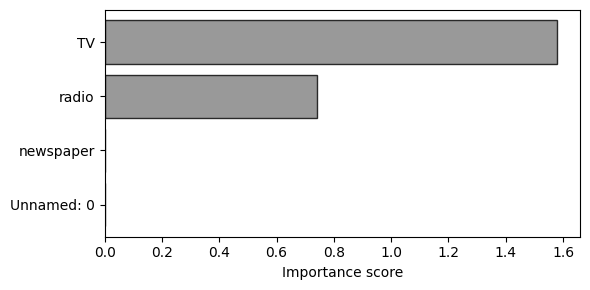

In [193]:
# 아래 예제 이용 adv.csv
# y :sales
# x : 나머지
# test 의 중요도 
import rfpimp
import matplotlib.pyplot as plt

#변수 중요도 및 시각화
imp = rfpimp.importances(rf, X_test, y_test)

fig, ax = plt.subplots(figsize=(6, 3))
ax.barh(imp.index, imp['Importance'], height=0.8, facecolor='grey', alpha=0.8, edgecolor='k')
ax.set_xlabel('Importance score')
plt.gca().invert_yaxis()
fig.tight_layout()

In [214]:
# pykrx 설치
#pip3 install pykrx

from pykrx import stock

data = stock.get_market_ohlcv("20230101", "20230831", "005930")


In [220]:
# 위의 데이타를 파티셔닝
# 20230715 ~ 20230831 train
# ~20230714 : test
# Y : 등락율 , X : 거래량, 종가, 시가
# linear regression , decision tree, random forest
# test 에 대한 mse 비교
# random forest importance
# 구글 트렌드 검색어 통계 : 동일기간의 해당 회사에 대한 검색어 통계
data.info()
data.head(10)

print(data.shape)
cols = ["등락률", "거래량", "종가", "시가"]
#train = data[data > '20230714']
train = data[cols].iloc[30:,:]
test = data[cols].iloc[:30,:]
#train = data.iloc[31:,:]
#test = data.iloc[:30,:]
train

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 166 entries, 2023-01-02 to 2023-08-31
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시가      166 non-null    int32  
 1   고가      166 non-null    int32  
 2   저가      166 non-null    int32  
 3   종가      166 non-null    int32  
 4   거래량     166 non-null    int32  
 5   등락률     166 non-null    float64
dtypes: float64(1), int32(5)
memory usage: 5.8 KB
(166, 6)


,등락률,거래량,종가,시가
날짜,,,,
2023-02-15,-1.582278,13208103,62200,63900
2023-02-16,2.411576,13798831,63700,62500
2023-02-17,-1.726845,10791265,62600,62900
2023-02-20,0.159744,12908073,62700,62900
2023-02-21,-0.956938,7665046,62100,62700
...,...,...,...,...
2023-08-25,-1.612903,7032462,67100,67100
2023-08-28,-0.447094,5824628,66800,66800
2023-08-29,0.000000,9114352,66800,66900


In [221]:
#X_train, y_train = train.drop(['등락률','고가','저가'],axis=1), train['등락률']
#X_test, y_test = test.drop(['등락률','고가','저가'],axis=1), test['등락률']
X_train, y_train = train.drop('등락률',axis=1), train['등락률']
X_test, y_test = test.drop('등락률',axis=1), test['등락률']


In [222]:
lr = sm.OLS(y_train, X_train).fit()
print (lr.summary())

                                 OLS Regression Results                                
Dep. Variable:                    등락률   R-squared (uncentered):                   0.616
Model:                            OLS   Adj. R-squared (uncentered):              0.608
Method:                 Least Squares   F-statistic:                              71.23
Date:                Fri, 01 Sep 2023   Prob (F-statistic):                    1.56e-27
Time:                        17:26:08   Log-Likelihood:                         -158.22
No. Observations:                 136   AIC:                                      322.4
Df Residuals:                     133   BIC:                                      331.2
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [223]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)


DecisionTreeRegressor()

In [224]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [225]:
mse_lr = mean_squared_error(y_test, lr.predict(X_test))
mse_dt = mean_squared_error(y_test, dt.predict(X_test) )
mse_rf = mean_squared_error(y_test, rf.predict(X_test) )
print(mse_lr, mse_dt, mse_rf)

0.9066860660313899 4.884614553587466 3.23299305487143


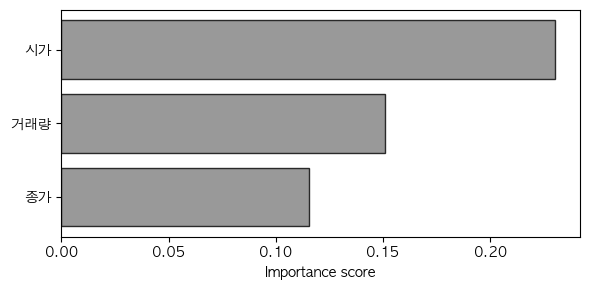

In [226]:
#변수 중요도 및 시각화
imp = rfpimp.importances(rf, X_test, y_test)

fig, ax = plt.subplots(figsize=(6, 3))
ax.barh(imp.index, imp['Importance'], height=0.8, facecolor='grey', alpha=0.8, edgecolor='k')
ax.set_xlabel('Importance score')
plt.gca().invert_yaxis()
fig.tight_layout()

In [229]:
google_trend = pd.read_csv('data/multiTimeline.csv')

google_trend.info()
google_trend



<class 'pandas.core.frame.DataFrame'>
Index: 241 entries, 일 to 2023-08-28
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   카테고리: 모든 카테고리  241 non-null    object
dtypes: object(1)
memory usage: 3.8+ KB


,카테고리: 모든 카테고리
일,삼성전자: (대한민국)
2023-01-01,29
2023-01-02,63
2023-01-03,59
2023-01-04,60
...,...
2023-08-24,36
2023-08-25,35
2023-08-26,15
2023-08-27,16
